Поиск аномалий

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

Задание 1: Истоки поиска аномальных данных

**Происхождение задачи:**
- Обнаружение аномалий возникло из статистики, машинного обучения и анализа больших данных.
- Применяется в финансах, медицине, кибербезопасности и других областях.

**Примеры применения:**
1. Финансы — обнаружение мошеннических транзакций
2. Медицина — выявление необычных показаний ЭКГ или анализов
3. Кибербезопасность — обнаружение подозрительной активности в системе

Задание 2: Вероятностный подход + МП

In [2]:
# Создаем данные с выбросами
X, _ = make_blobs(n_samples=300, centers=1, random_state=42)
X = np.append(X, [[10, 10], [-8, -8]], axis=0)  # Аномалии

In [3]:
# Оценка параметров нормального распределения
mu = np.mean(X, axis=0)
sigma = np.cov(X.T)

In [4]:
# Рассчитываем вероятности
probabilities = multivariate_normal.pdf(X, mean=mu, cov=sigma)
threshold = np.percentile(probabilities, 5)
anomalies = X[probabilities < threshold]

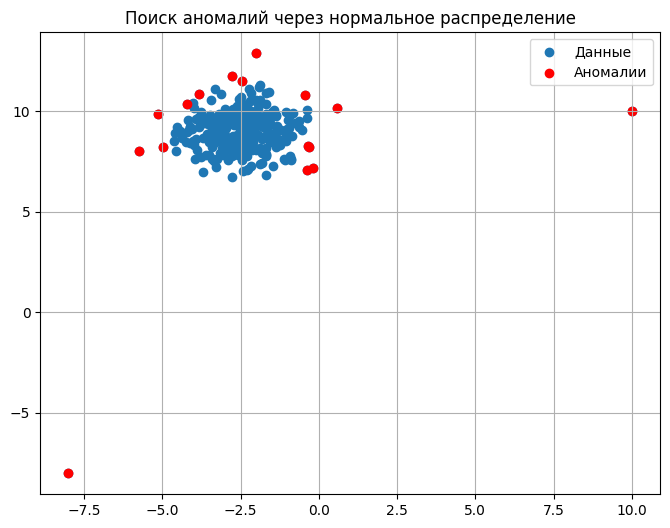

In [5]:
# Визуализация
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], label='Данные')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Аномалии')
plt.title('Поиск аномалий через нормальное распределение')
plt.legend()
plt.grid(True)
plt.show()

Задание 3: GMM для поиска аномалий

In [6]:
# Обучение модели смеси гауссиан
gmm = GaussianMixture(n_components=2, random_state=42)
labels = gmm.fit_predict(X)

In [7]:
# Расчёт логарифма плотности вероятности
probs = gmm.score_samples(X)
gmm_threshold = np.percentile(probs, 5)
gmm_anomalies = X[probs < gmm_threshold]

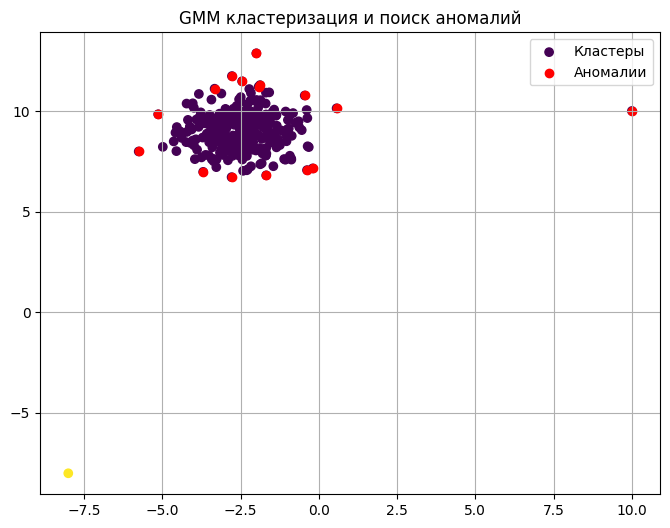

In [8]:
# Визуализация кластеров и аномалий
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Кластеры')
plt.scatter(gmm_anomalies[:, 0], gmm_anomalies[:, 1], color='red', label='Аномалии')
plt.title('GMM кластеризация и поиск аномалий')
plt.legend()
plt.grid(True)
plt.show()

Выводы:
    Точки разделены на кластеры.
    Аномалии найдены по низкой вероятности принадлежности ко всем кластерам.